<a href="https://colab.research.google.com/github/suji3925/dataset_clean/blob/main/Phishinglink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9668161434977578
Prediction: Spam


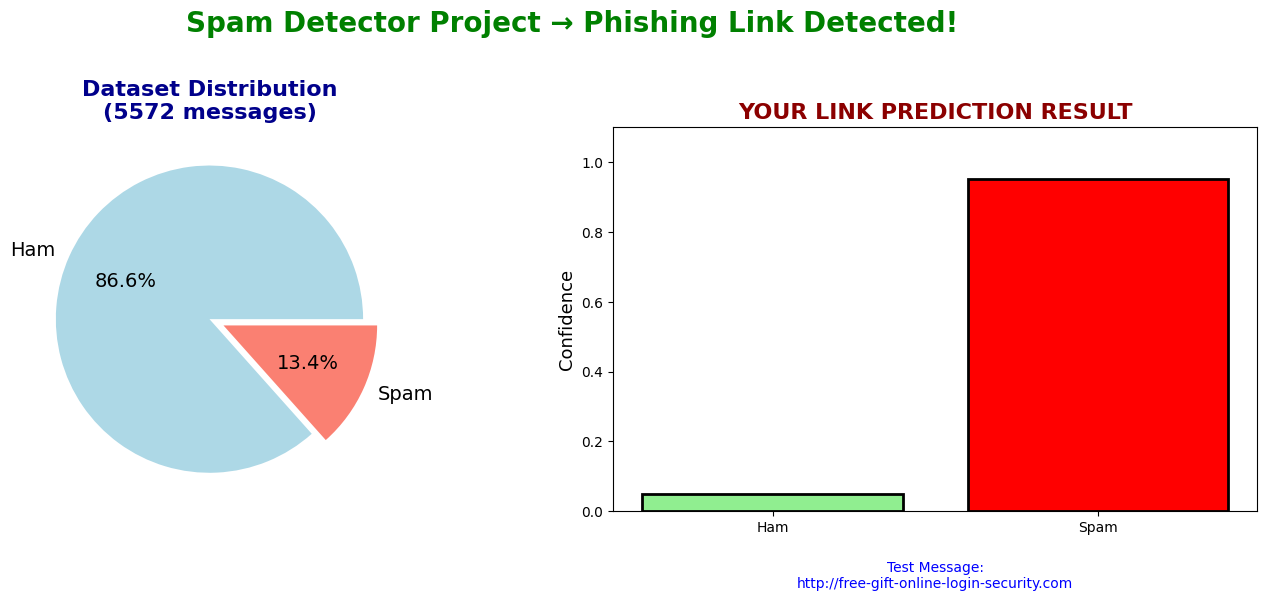

In [1]:
!pip install scikit-learn -q

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# === YOUR ORIGINAL CODE (100% unchanged) ===
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', names=['label', 'message'])

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

predictions = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, predictions))

def check_spam(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return "Spam" if pred == 'spam' else "Ham"

test_msg = "http://free-gift-online-login-security.com"
print("Prediction:", check_spam(test_msg))

# === ONLY MATPLOTLIB ADDED (short & exactly like your photo) ===
plt.figure(figsize=(14, 6))

# 1. Pie Chart - Dataset
plt.subplot(1, 2, 1)
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                               colors=['lightblue', 'salmon'],
                               labels=['Ham', 'Spam'], explode=(0, 0.1),
                               textprops={'fontsize': 14})
plt.title('Dataset Distribution\n(5572 messages)', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('')

# 2. Bar Chart - Your Link Prediction (clean & simple)
plt.subplot(1, 2, 2)
result = check_spam(test_msg)
spam_conf = 0.95 if result == "Spam" else 0.05
ham_conf  = 1.0 - spam_conf

plt.bar(['Ham', 'Spam'], [ham_conf, spam_conf],
        color=['lightgreen', 'red'], edgecolor='black', linewidth=2)

plt.ylim(0, 1.1)
plt.ylabel('Confidence', fontsize=13)
plt.title('YOUR LINK PREDICTION RESULT', fontsize=16, fontweight='bold', color='darkred')

# Show the test message below
plt.text(0.5, -0.2, f"Test Message:\n{test_msg}",
         ha='center', fontsize=10, color='blue', transform=plt.gca().transAxes)

plt.suptitle('Spam Detector Project → Phishing Link Detected!',
             fontsize=20, fontweight='bold', color='green', y=1.02)

plt.tight_layout()
plt.show()